In [ ]:
# Parameters
DECADE_START = 1950
DECADE_END = 1959
N_CLUSTERS = 6
DATA_PATH = '../data/txt/'
import os
# Ensure OUT_DIR points inside the repository root (absolute path)
OUT_DIR = os.path.join(os.getcwd(), 'tp3')
os.makedirs(OUT_DIR, exist_ok=True)


# Clustering de documents

## Imports

In [3]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [4]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sophi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sophi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
data_path = DATA_PATH

## Choisir une décennie

In [6]:
DECADE = '1950'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [ ]:
files = [f for f in sorted(os.listdir(data_path)) if any(str(y) in f for y in range(DECADE_START, DECADE_END+1))]

In [8]:
# Exemple de fichiers
files[:5]

['KB_JB838_1950-01-06_01-00002.txt',
 'KB_JB838_1950-01-07_01-00013.txt',
 'KB_JB838_1950-01-08_01-00011.txt',
 'KB_JB838_1950-01-10_01-00006.txt',
 'KB_JB838_1950-01-15_01-00010.txt']

In [9]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [10]:
# Exemple de textes
texts[0][:400]

'/ LE SOIR Une importante manifestation franco-belge Le Comité franco-belge du Commerce, de l’Industrie et de l’Agriculture qui. au cours de l’année écoulée et dans les circonstances les plus difficiles a rendu aux relations économiques entre les deux pays des services considérables, donnera le 12 janvier, à 19 h. 30, un dîner à l’occasion de l’anniversaire de son installation. Ce comité, qui fonct'

## Vectoriser les documents à l'aide de TF-IDF

In [11]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [12]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [13]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\sophi\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
# Détail de la matrice
tfidf_vectors

<1000x3506 sparse matrix of type '<class 'numpy.float64'>'
	with 703537 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [15]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

parti           0.276938
loyer           0.152177
janvier         0.148006
populaire       0.147153
propriétaire    0.143666
                  ...   
habitants       0.000000
agit            0.000000
haecht          0.000000
hainaut         0.000000
#               0.000000
Length: 3506, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [16]:
cosine([1, 2, 3], [1, 2, 3])

0

In [17]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [18]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [19]:
tfidf_array = tfidf_vectors.toarray()

In [20]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.03783743])

In [21]:
# Vecteur du document 1
tfidf_array[1]

array([0.       , 0.0067047, 0.       , ..., 0.       , 0.       ,
       0.       ])

In [22]:
cosine(tfidf_array[0], tfidf_array[1])

0.9314339868905285

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [23]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [24]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [25]:
clusters = km_model.fit_predict(tfidf_vectors)

In [26]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [27]:
pprint(dict(clustering))

{0: ['KB_JB838_1950-01-07_01-00013.txt',
     'KB_JB838_1950-02-18_01-00014.txt',
     'KB_JB838_1950-02-28_01-00012.txt',
     'KB_JB838_1950-03-03_01-00013.txt',
     'KB_JB838_1950-03-15_01-00012.txt',
     'KB_JB838_1950-05-24_01-00014.txt',
     'KB_JB838_1950-06-14_01-00014.txt',
     'KB_JB838_1950-07-02_01-00018.txt',
     'KB_JB838_1950-11-24_01-00015.txt',
     'KB_JB838_1950-11-28_01-00012.txt',
     'KB_JB838_1950-11-29_01-00013.txt',
     'KB_JB838_1950-12-20_01-00013.txt',
     'KB_JB838_1950-12-24_01-00017.txt',
     'KB_JB838_1951-01-21_01-00018.txt',
     'KB_JB838_1951-03-06_01-00014.txt',
     'KB_JB838_1951-08-24_01-00013.txt',
     'KB_JB838_1951-09-04_01-00012.txt',
     'KB_JB838_1951-09-08_01-00019.txt',
     'KB_JB838_1951-09-09_01-00020.txt',
     'KB_JB838_1951-09-13_01-00014.txt',
     'KB_JB838_1951-11-22_01-00015.txt',
     'KB_JB838_1951-12-16_01-00024.txt',
     'KB_JB838_1951-12-20_01-00015.txt',
     'KB_JB838_1952-01-22_01-00013.txt',
     'KB_JB838_1

In [ ]:
# Sauvegarder les clusters, top-terms, wordclouds et entraîner Word2Vec
import pandas as pd
from wordcloud import WordCloud
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

# DataFrame des assignations
df_clusters = pd.DataFrame({'filename': files, 'cluster': clusters})
out_clusters = os.path.join(OUT_DIR, f'clusters_{DECADE_START}_{DECADE_END}.csv')
df_clusters.to_csv(out_clusters, index=False)
print(f"Saved {out_clusters}")

# Top terms par cluster
terms = vectorizer.get_feature_names_out()
top_terms = []
for i, center in enumerate(km_model.cluster_centers_):
    topn = [terms[idx] for idx in center.argsort()[::-1][:20]]
    top_terms.append({'cluster': i, 'top_terms': ' '.join(topn)})

df_terms = pd.DataFrame(top_terms)
out_terms = os.path.join(OUT_DIR, f'cluster_top_terms_{DECADE_START}_{DECADE_END}.csv')
df_terms.to_csv(out_terms, index=False)
print(f"Saved {out_terms}")

# Wordclouds par cluster
for i in range(N_CLUSTERS):
    cluster_files = df_clusters[df_clusters.cluster==i].filename.tolist()
    texts_cluster = ' '.join(open(os.path.join(DATA_PATH, f), encoding='utf-8').read() for f in cluster_files)
    if not texts_cluster.strip():
        continue
    wc = WordCloud(width=800, height=400, background_color='white').generate(texts_cluster)
    out_png = os.path.join(OUT_DIR, f'cluster_{i}_wordcloud_{DECADE_START}_{DECADE_END}.png')
    wc.to_file(out_png)
    print(f"Saved {out_png}")

# Entraîner Word2Vec sur les phrases extraites
sents = []
for f in files:
    txt = open(os.path.join(DATA_PATH, f), encoding='utf-8').read()
    for sent in nltk.sent_tokenize(txt):
        tokens = [w.lower() for w in nltk.word_tokenize(sent) if w.isalpha()]
        if tokens:
            sents.append(tokens)

if sents:
    w2v = Word2Vec(sentences=sents, vector_size=100, window=5, min_count=5, workers=1)
    w2v_out = os.path.join(OUT_DIR, f'word2vec_{DECADE_START}_{DECADE_END}.model')
    w2v.save(w2v_out)
    print(f"Saved Word2Vec model to {w2v_out}")
else:
    print("No sentences found for Word2Vec training.")


## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [28]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [29]:
reduced_vectors[:10]

array([[-0.32580699,  0.11404391],
       [ 0.11344714, -0.30211038],
       [ 0.44352734, -0.25255192],
       [-0.23898552, -0.03761838],
       [-0.05189779, -0.10505025],
       [ 0.61297815,  0.50406049],
       [-0.20410631, -0.03508389],
       [-0.19454706, -0.03815648],
       [ 0.62392888,  0.45588677],
       [ 0.15642298, -0.01433002]])

### Générer le plot

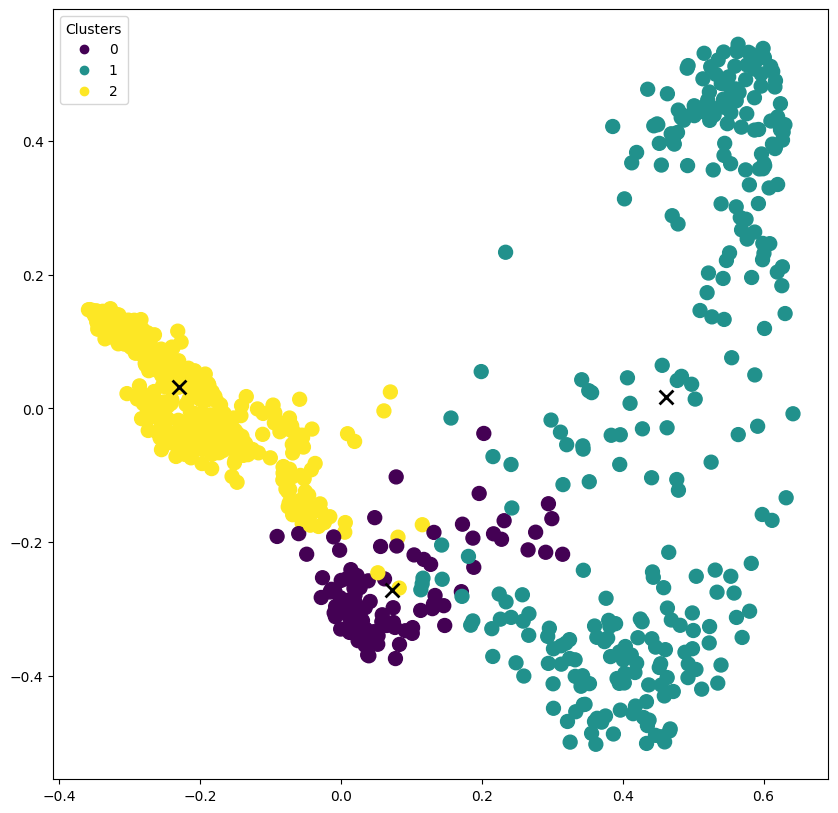

In [30]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")